### Flight Delay Classification Problem 

##### Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.utils import to_categorical


In [13]:
# Importing the dataset
dataset = pd.read_csv('output/class2013/2013.csv', header = 0)
X = dataset.iloc[:, :12].values
y = dataset.iloc[:,12].values

In [ ]:
##### Converting labels to continuous categories

In [14]:
y = to_categorical(y)

In [15]:
y.shape

(2705373, 9)

In [6]:
dataset.head()

,OP_CARRIER,OP_CARRIER_FL_NUM,CRS_DEP_TIME,ARR_DELAY,CRS_ARR_TIME,DIVERTED,CANCELLED,ORIG_AREA,DEST_AREA,ORIG_WEATHER,DEST_WEATHER,ARR_DELAY_CAT,DEP_DELAY_CAT
0,9E,3819,1645,57.0,1813,0.0,0.0,SE,MSE,Snow,Snow,8,8
1,AA,1051,1255,28.0,1550,0.0,0.0,MNE,MSW,Snow,Snow,7,7
2,AA,1156,1645,25.0,2030,0.0,0.0,MNE,MSE,Rain,Rain,7,6
3,AA,1333,1605,-10.0,2010,0.0,0.0,MNE,MSE,Snow,Rain,4,4
4,AA,1735,735,-17.0,840,0.0,0.0,MSE,MSE,Snow,Rain,3,5


##### Encoding Label

In [16]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X_1 = LabelEncoder()
# labelencoder_X_2 = LabelEncoder()
# labelencoder_X_3 = LabelEncoder()
# labelencoder_X_4 = LabelEncoder()
# labelencoder_X_5 = LabelEncoder()
# labelencoder_X_6 = LabelEncoder()
labelencoder_X_7 = LabelEncoder()
labelencoder_X_8 = LabelEncoder()
labelencoder_X_9 = LabelEncoder()
labelencoder_X_10 = LabelEncoder()
# labelencoder_X_11 = LabelEncoder()


X[:, 0] = labelencoder_X_1.fit_transform(X[:, 0])
# X[:, 1] = labelencoder_X_2.fit_transform(X[:, 1])
# X[:, 2] = labelencoder_X_3.fit_transform(X[:, 2])
# X[:, 3] = labelencoder_X_4.fit_transform(X[:, 3])
# X[:, 4] = labelencoder_X_5.fit_transform(X[:, 4])
# X[:, 5] = labelencoder_X_6.fit_transform(X[:, 5])
X[:, 7] = labelencoder_X_7.fit_transform(X[:, 7])
X[:, 8] = labelencoder_X_8.fit_transform(X[:, 8])
X[:, 9] = labelencoder_X_9.fit_transform(X[:, 9])
X[:, 10] = labelencoder_X_10.fit_transform(X[:, 10])
#X[:, 10] = labelencoder_X_11.fit_transform(X[:,10])


# onehotencoder = OneHotEncoder()
# X = onehotencoder.fit_transform(X).toarray()


##### Train Test Split 

In [17]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
X_train[0]

array([ 0.70160921, -0.66343661,  0.36745576,  0.29962521,  0.64700932,
       -0.04747107, -0.1247082 , -1.38962349,  0.37634101,  0.45910194,
        0.45947722,  1.15937109])

In [20]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend
from keras.layers import Dense, BatchNormalization


##### Modelling ANN 

In [21]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=32, activation='relu', input_dim=(13,)))

# Adding the second hidden layer
classifier.add(Dense(units=64, activation='relu'))

# Adding the second hidden layer
classifier.add(Dense(units=128, activation='relu'))

# Adding the second hidden layer
classifier.add(Dense(units=64, activation='relu'))

# Adding the second hidden layer
classifier.add(Dense(units=32, activation='relu'))

# Adding the output layer
classifier.add(Dense(units=9, activation='softmax'))

# Compiling the ANN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=256, epochs=50, validation_split=0.2)


Epoch 1/50
5918/5918 [==============================] - 19s 3ms/step - loss: 0.8914 - accuracy: 0.6347 - val_loss: 0.8634 - val_accuracy: 0.6413
Epoch 2/50
5918/5918 [==============================] - 19s 3ms/step - loss: 0.8562 - accuracy: 0.6445 - val_loss: 0.8540 - val_accuracy: 0.6459
Epoch 3/50
5918/5918 [==============================] - 19s 3ms/step - loss: 0.8482 - accuracy: 0.6474 - val_loss: 0.8439 - val_accuracy: 0.6491
Epoch 4/50
5918/5918 [==============================] - 16s 3ms/step - loss: 0.8440 - accuracy: 0.6485 - val_loss: 0.8413 - val_accuracy: 0.6489
Epoch 5/50
5918/5918 [==============================] - 17s 3ms/step - loss: 0.8413 - accuracy: 0.6497 - val_loss: 0.8414 - val_accuracy: 0.6501
Epoch 6/50
5918/5918 [==============================] - 17s 3ms/step - loss: 0.8391 - accuracy: 0.6505 - val_loss: 0.8369 - val_accuracy: 0.6514
Epoch 7/50
5918/5918 [==============================] - 18s 3ms/step - loss: 0.8374 - accuracy: 0.6512 - val_loss: 0.8364 - val_ac

In [23]:
classifier.save_weights('./checkpoints/weights')


In [23]:
from IPython.display import display, HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))


In [26]:
acc = classifier.history.history['accuracy']
val_acc = classifier.history.history['val_accuracy']
loss = classifier.history.history['loss']
val_loss = classifier.history.history['val_loss']
epochs_range = range(50)

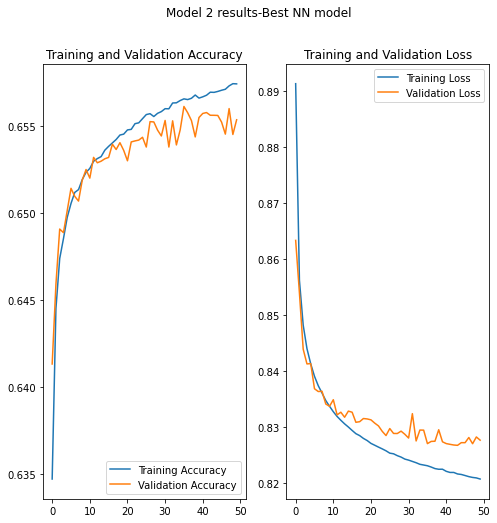

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.suptitle('Model 2 results-Best NN model')
plt.show()
